In [1]:
import nltk

In [3]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
sms = [line for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
len(sms)

5574

In [6]:
type(sms)

list

In [7]:
sms[1]

'ham\tOk lar... Joking wif u oni...\n'

In [8]:
import pandas as pd

In [11]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep = '\t',names=['target','sms'])

In [12]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
target    5572 non-null object
sms       5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [16]:
df.groupby('target')['sms'].describe()

,count,unique,top,freq
target,,,,
ham,4825,4516,"Sorry, I'll call later",30
spam,747,653,Please call our customer service representativ...,4


In [17]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [40]:
df['length']= df['sms'].apply(len)

In [41]:
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.apply(lambda x:, axis=1)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

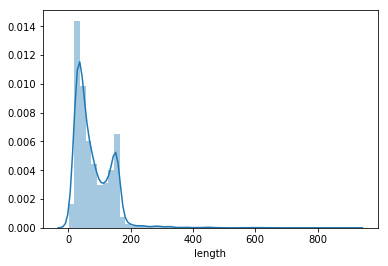

In [46]:
sns.distplot(df['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E841BD6D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000014E83047160>], dtype=object)

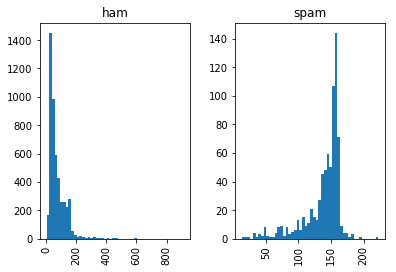

In [47]:
df.hist(column='length', by='target',bins = 50)

In [48]:
import string

In [74]:
s = 'This is A sample, to remove !,* and $'

In [75]:
s

'This is A sample, to remove !,* and $'

In [76]:
nopun=[ c for c in s if c not in string.punctuation]

In [77]:
nopun =''.join(nopun)

In [78]:
nopun

'This is A sample to remove  and '

In [79]:
from nltk.corpus import stopwords

In [82]:
stopword = stopwords.words('english')[1:5]

In [83]:
stopword

['me', 'my', 'myself', 'we']

In [84]:
nopunLst = nopun.split()

In [85]:
nopunLst

['This', 'is', 'A', 'sample', 'to', 'remove', 'and']

In [90]:
nostopwrd = [i for i in nopunLst if i.lower() not in stopwords.words('english')]

In [91]:
nostopwrd

['sample', 'remove']

In [92]:
nostopwrd

['sample', 'remove']

In [95]:
def processtext(rawtext):
    noPunc = [c for c in rawtext if c not in string.punctuation]
    noPunc = ''.join(noPunc)
    cleanWords= [i for i in noPunc.split() if i.lower() not in stopwords.words('english')]
    return cleanWords

In [96]:
cln = processtext('This is A sample, to remove !,* and $')

In [97]:
cln

['sample', 'remove']

In [99]:
ss = processtext('Go until jurong point, crazy.. Available only ...') 

In [100]:
ss

['Go', 'jurong', 'point', 'crazy', 'Available']

In [101]:
df['sms'].apply(processtext);

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
bow_transformer = CountVectorizer(analyzer= processtext).fit(df['sms'])

In [104]:
sam =bow_transformer.vocabulary_

In [106]:
len(sam)


11425

In [123]:
bow_transformer.vocabulary_.get('way')

10979

In [109]:
sms_18 = df['sms'][18]

In [110]:
sms_18

'Fine if that\x92s the way u feel. That\x92s the way its gota b'

In [116]:
bow_18 = bow_transformer.transform([sms_18])

In [117]:
bow_18

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [119]:
print(bow_18)
print(bow_18.shape)

  (0, 1914)	1
  (0, 3964)	1
  (0, 4880)	1
  (0, 6517)	1
  (0, 6907)	1
  (0, 10405)	1
  (0, 10698)	1
  (0, 10979)	2
(1, 11425)


In [126]:
by_id =bow_transformer.get_feature_names()[10979]

In [127]:
by_id

'way'

In [129]:
df_bow = bow_transformer.transform(df['sms'])

In [131]:
df_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [132]:
df_bow.shape

(5572, 11425)

In [133]:
df_bow.nnz

50548

In [136]:
total = df_bow.shape[0]* df_bow.shape[1]

In [137]:
total

63660100

In [146]:
sparcity = df_bow.nnz/total*100

In [147]:
sparcity

0.07940295412668218

In [148]:
from sklearn.feature_extraction.text import TfidfTransformer

In [149]:
tfidf = TfidfTransformer()

In [151]:
tfidf.fit(df_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [152]:
ftidf_18 =tfidf.transform(bow_18) 

In [153]:
print(ftidf_18)

  (0, 10979)	0.461428791272
  (0, 10698)	0.14951677306
  (0, 10405)	0.407177880884
  (0, 6907)	0.407177880884
  (0, 6517)	0.257793651128
  (0, 4880)	0.259547084742
  (0, 3964)	0.407177880884
  (0, 1914)	0.365410001719


In [154]:
tfidf.idf_[bow_transformer.vocabulary_['way']]

5.0613405961017

In [155]:
df_ftidf=tfidf.transform(df_bow)

In [156]:
print(df_ftidf.shape)

(5572, 11425)


In [158]:
from sklearn.naive_bayes import MultinomialNB

In [159]:
hum_spam_detctor = MultinomialNB()

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X= df_ftidf
y =df['target']

In [162]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [164]:
hum_spam_detctor.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
y_perd = hum_spam_detctor.predict(X_test)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix


In [168]:
print(confusion_matrix(y_perd,y_test))
print(classification_report(y_perd,y_test))

[[1593   71]
 [   0  175]]
             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1664
       spam       0.71      1.00      0.83       175

avg / total       0.97      0.96      0.96      1839



In [169]:
X = df['sms']
y = df['target']

In [170]:
from sklearn.model_selection import  train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [172]:
from sklearn.pipeline import Pipeline

In [174]:
pipline = Pipeline([
    #Tokenizer using sklearn CoutnVector
    ('bow', CountVectorizer(analyzer=processtext)),
    #compute TF -IDF weight score
    ('tfidf',TfidfTransformer()),
    #Naive Bayse classifier to train tfidf  vectors
    ('nb_model', MultinomialNB())
])

In [175]:
pipline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function processtext at 0x0000014E84295048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor..._tf=False, use_idf=True)), ('nb_model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [176]:
ypred = pipline.predict(X_test)

In [177]:
print(confusion_matrix(y_perd,y_test))
print(classification_report(y_perd,y_test))

[[1593   71]
 [   0  175]]
             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1664
       spam       0.71      1.00      0.83       175

avg / total       0.97      0.96      0.96      1839

